In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

species_of_interest = [
    "H",
    "H2",
    "O",
    "C",
    "N",
    "CL",
    "E_minus",
    "CO",
    "MG",
    "#C",
    "H2O",
    "SI",
]

In [6]:
df = pd.read_hdf("../../data/grav_collapse_clean.h5", key="val")
df

,Index,Model,Time,Density,Radfield,Av,gasTemp,#C,#C2,#C2H,...,SIH5+,SIO,SIO+,SIOH+,SIS,SIS+,SO,SO+,SO2,SO2+
0,1485,5.0,0.0,2.475524e+06,0.000100,124.724083,13.316765,1.000000e-30,1.000000e-30,1.000000e-30,...,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30
1,1486,5.0,92.9,2.475576e+06,0.000915,123.352625,37.272742,2.817193e-13,6.048663e-11,1.901946e-15,...,3.934198e-17,3.854908e-07,1.538064e-13,3.270125e-10,4.519507e-11,3.803938e-17,1.558633e-13,1.551434e-14,1.127833e-17,4.928543e-26
2,1487,5.0,185.8,2.475734e+06,0.002441,118.619214,37.273193,1.332205e-13,2.803396e-10,2.963930e-13,...,2.445262e-13,5.782543e-07,1.461641e-14,1.822313e-09,1.446061e-10,5.270619e-18,1.123215e-12,3.375178e-12,1.726504e-17,4.183047e-26
3,1488,5.0,278.7,2.475997e+06,0.004171,132.064312,37.273945,1.785236e-13,3.409488e-10,4.678396e-13,...,2.949891e-13,5.896333e-07,8.357492e-15,2.893080e-09,1.893671e-10,7.004900e-18,1.891316e-12,3.767226e-12,2.902346e-17,6.756959e-26
4,1489,5.0,371.6,2.476363e+06,0.006255,133.646594,37.274998,2.394067e-13,4.147491e-10,7.103583e-13,...,2.950165e-13,5.804950e-07,5.354059e-15,3.498224e-09,2.115916e-10,9.386102e-18,2.328908e-12,3.787554e-12,3.573230e-17,8.815424e-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741010,2963758,9978.0,27126.8,7.763906e+04,0.004172,4.395878,28.220272,1.993537e-14,9.905272e-10,1.823899e-11,...,7.428627e-14,3.570409e-08,3.374260e-16,2.323992e-10,2.944902e-12,1.366942e-14,6.448945e-12,1.881876e-11,2.166335e-14,2.056398e-20
741011,2963759,9978.0,27219.7,7.710364e+04,0.004286,2.907921,28.196477,1.911747e-14,9.899456e-10,1.826711e-11,...,7.393906e-14,3.563371e-08,3.354582e-16,2.311452e-10,2.911839e-12,1.357824e-14,6.466022e-12,1.876441e-11,2.158776e-14,2.064687e-20
741012,2963760,9978.0,27312.6,7.657411e+04,0.009786,1.173676,28.172518,1.839867e-14,9.893626e-10,1.829151e-11,...,7.357795e-14,3.556663e-08,3.423802e-16,2.304969e-10,2.879267e-12,1.348634e-14,6.482933e-12,1.865966e-11,2.151327e-14,2.073020e-20
741013,2963761,9978.0,27405.5,7.605042e+04,0.005952,5.029348,28.148750,2.276693e-14,9.887758e-10,1.832739e-11,...,7.232625e-14,3.574368e-08,7.269153e-16,2.357076e-10,2.853023e-12,1.333271e-14,6.486427e-12,2.005257e-11,2.141177e-14,2.135194e-20


In [ ]:
physical_params = {
    "Density": "n_H / cm^3",
    "gasTemp": "K",
    "Av": "mag",
    "radfield": "habing",
}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, (column, unit) in enumerate(physical_params.items()):
    col_data = np.log10(df[column].dropna())
    lower = col_data.quantile(0.005)
    upper = col_data.quantile(0.995)

    filtered_data = col_data[(col_data >= lower) & (col_data <= upper)]

    axes[idx].hist(filtered_data, bins=50, edgecolor="k")
    axes[idx].set_title(f"Log {column} Distribution")
    axes[idx].set_xlabel(f"Log {column} ({unit})")
    axes[idx].set_ylabel("Frequency")
    axes[idx].grid(True)

plt.tight_layout()
plt.show()

for column, unit in physical_params.items():
    col_data = np.log10(df[column].dropna())
    lower = col_data.quantile(0.005)
    upper = col_data.quantile(0.995)

    filtered_data = col_data[(col_data >= lower) & (col_data <= upper)]

    print(f"\nDescriptive stats for Log {column} ({unit}):")
    print(filtered_data.describe())

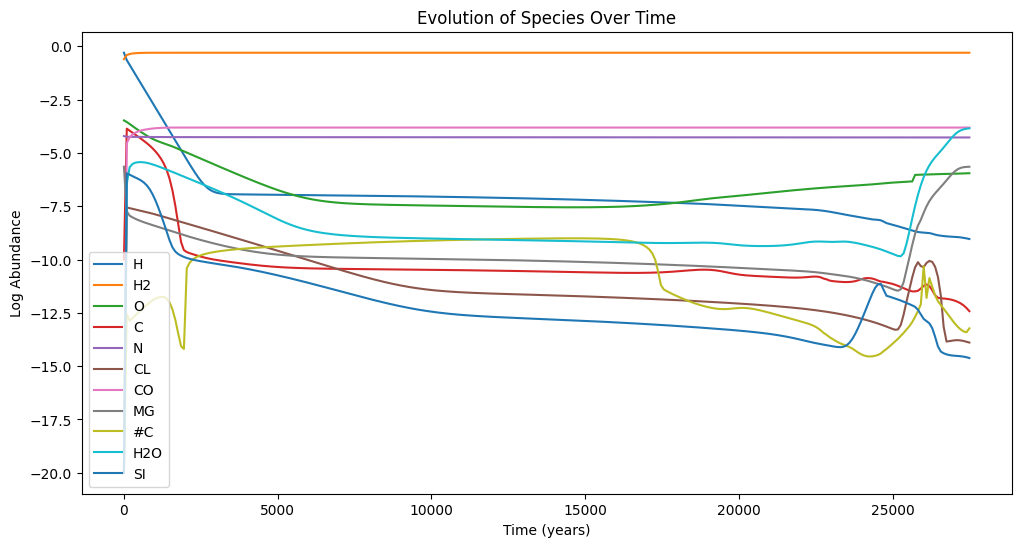

In [39]:
df_tracer = df[df["Model"] == 15]

fig, ax = plt.subplots(figsize=(12, 6))

for species in species_of_interest:
    if species in df_tracer.columns:
        log_abundance = np.log10(df_tracer[species].replace(0, np.nan))
        log_abundance = np.maximum(log_abundance, -20)
        ax.plot(df_tracer["Time"], log_abundance, label=species)

ax.set_xlabel("Time (years)")
ax.set_ylabel("Log Abundance")
ax.set_title("Evolution of Species Over Time")
ax.legend()
plt.show()